In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv(r"C:\Users\Sarthak\Desktop\Data Science\Python\alzheimers_prediction_dataset.csv")

In [3]:
df.isnull().sum()

Country                                 0
Age                                     0
Gender                                  0
Education Level                         0
BMI                                     0
Physical Activity Level                 0
Smoking Status                          0
Alcohol Consumption                     0
Diabetes                                0
Hypertension                            0
Cholesterol Level                       0
Family History of Alzheimer’s           0
Cognitive Test Score                    0
Depression Level                        0
Sleep Quality                           0
Dietary Habits                          0
Air Pollution Exposure                  0
Employment Status                       0
Marital Status                          0
Genetic Risk Factor (APOE-ε4 allele)    0
Social Engagement Level                 0
Income Level                            0
Stress Levels                           0
Urban vs Rural Living             

In [4]:
df["Alzheimer’s Diagnosis"].value_counts()

Alzheimer’s Diagnosis
No     43570
Yes    30713
Name: count, dtype: int64

In [5]:
cat=[]
num=[]
for i in df.columns:
    if df[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)


In [6]:
cat

['Country',
 'Gender',
 'Physical Activity Level',
 'Smoking Status',
 'Alcohol Consumption',
 'Diabetes',
 'Hypertension',
 'Cholesterol Level',
 'Family History of Alzheimer’s',
 'Depression Level',
 'Sleep Quality',
 'Dietary Habits',
 'Air Pollution Exposure',
 'Employment Status',
 'Marital Status',
 'Genetic Risk Factor (APOE-ε4 allele)',
 'Social Engagement Level',
 'Income Level',
 'Stress Levels',
 'Urban vs Rural Living',
 'Alzheimer’s Diagnosis']

In [7]:
num

['Age', 'Education Level', 'BMI', 'Cognitive Test Score']

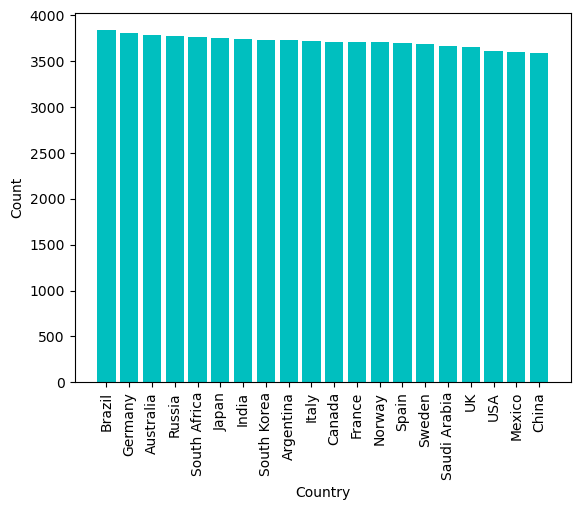

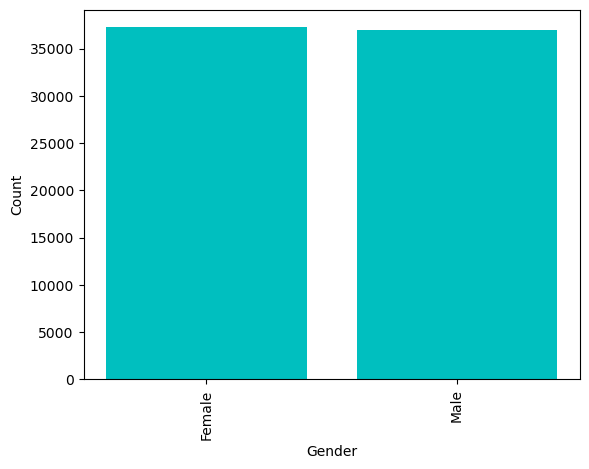

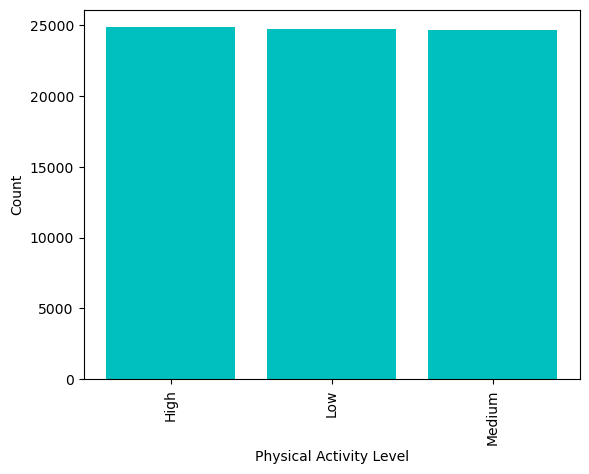

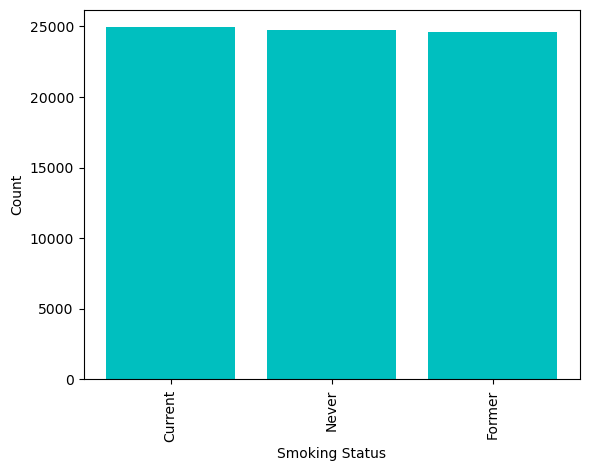

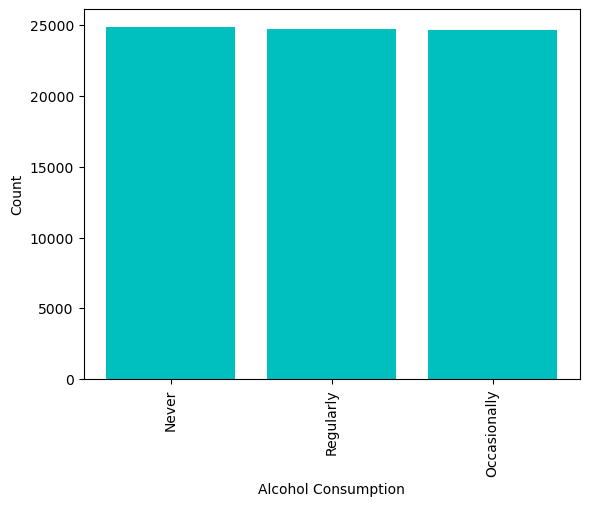

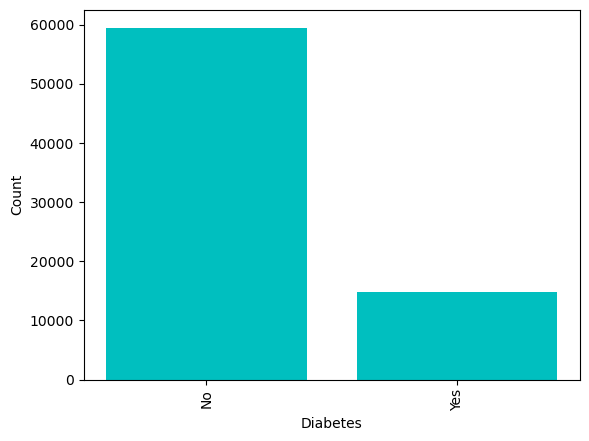

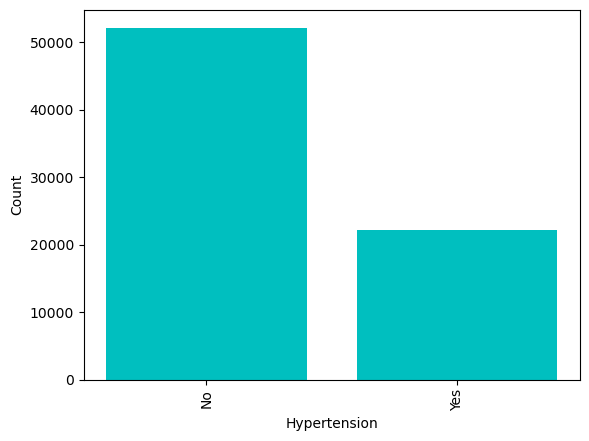

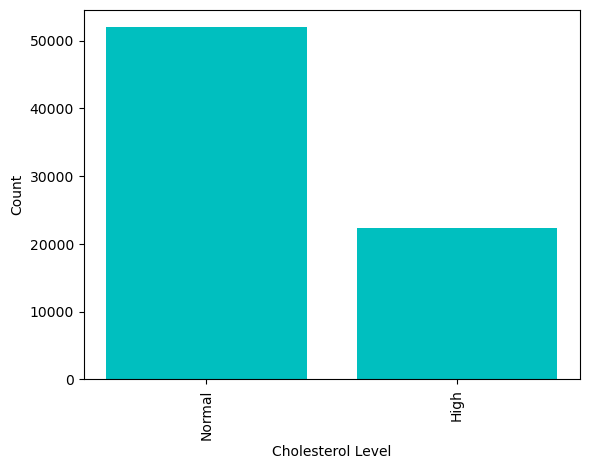

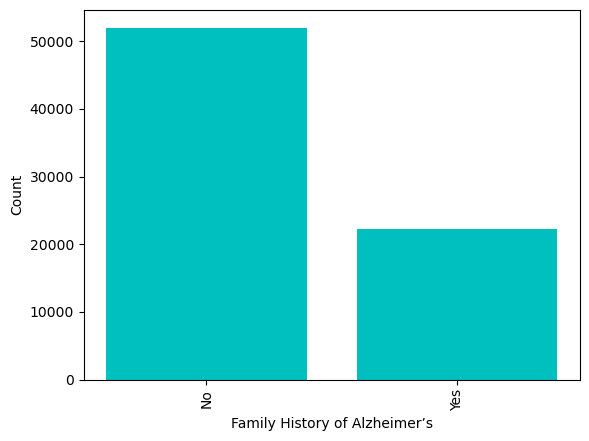

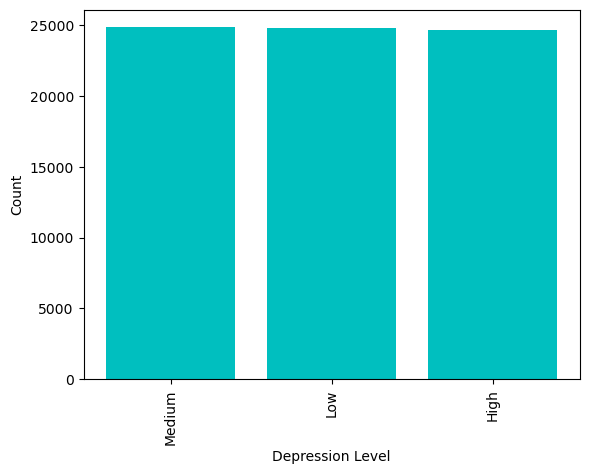

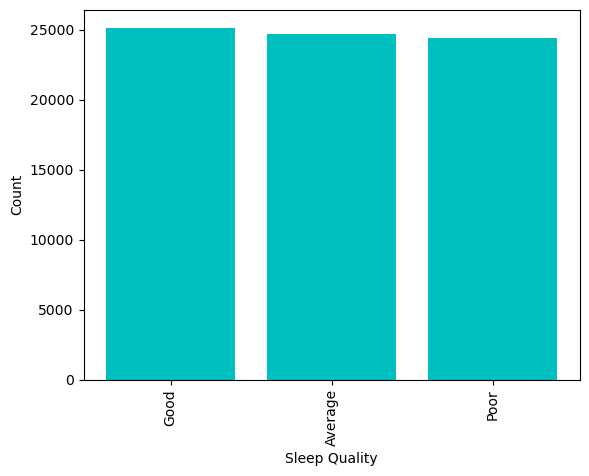

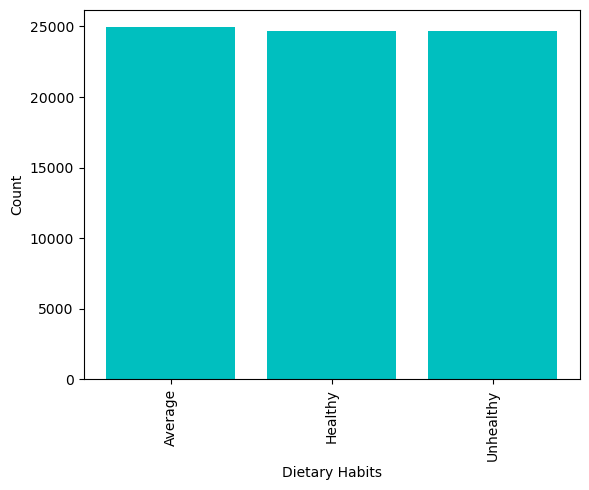

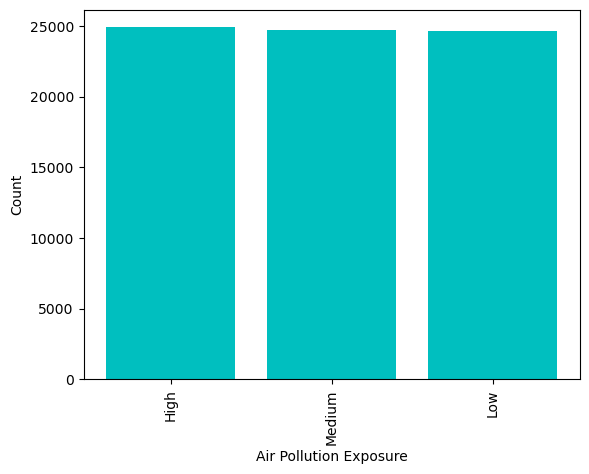

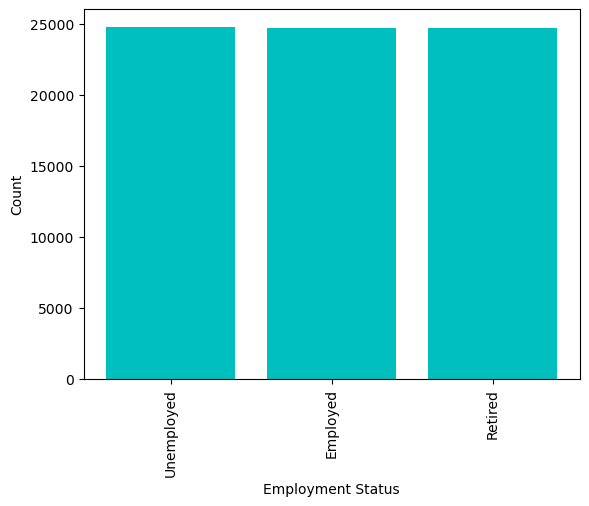

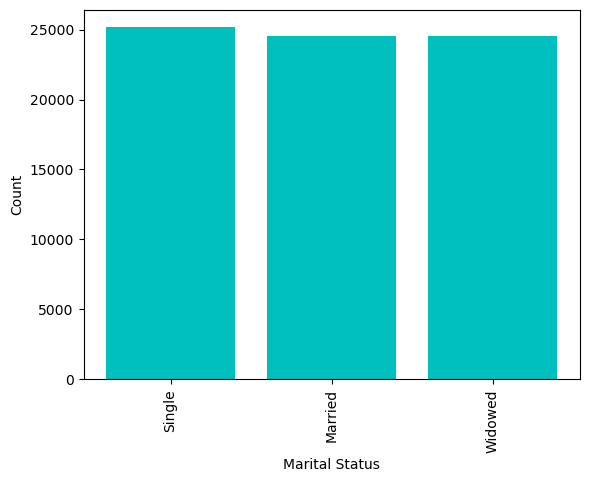

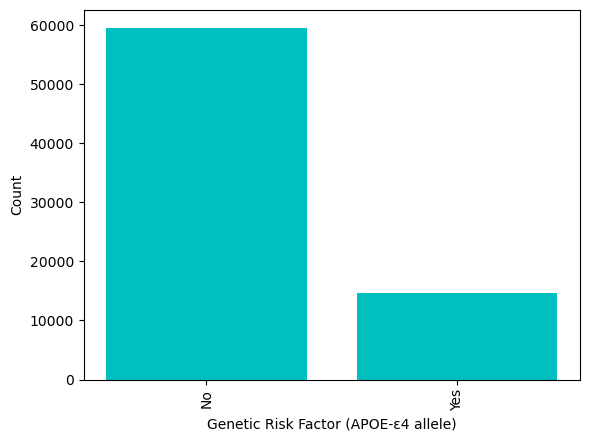

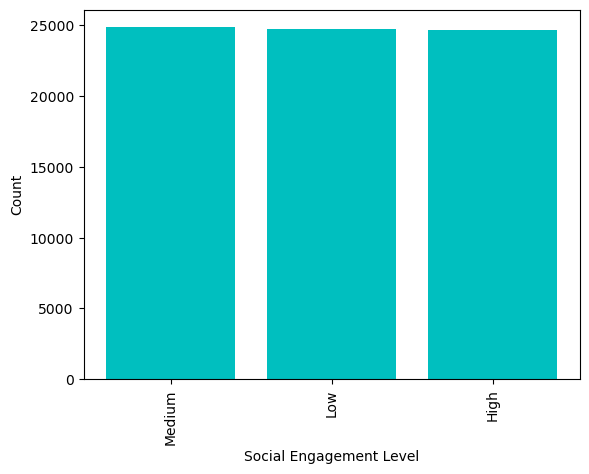

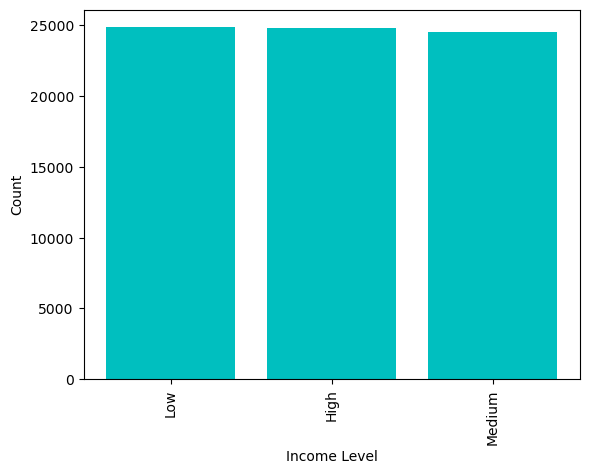

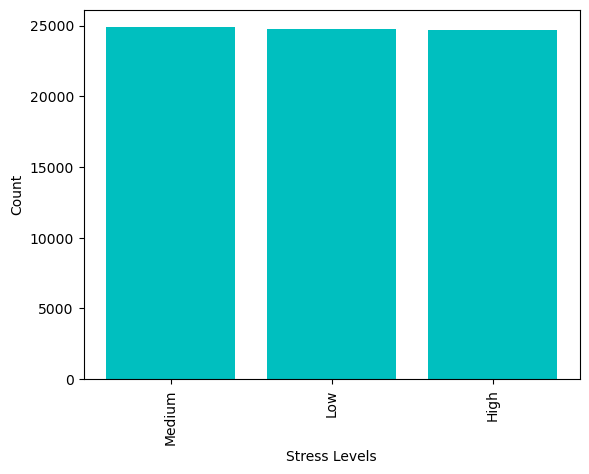

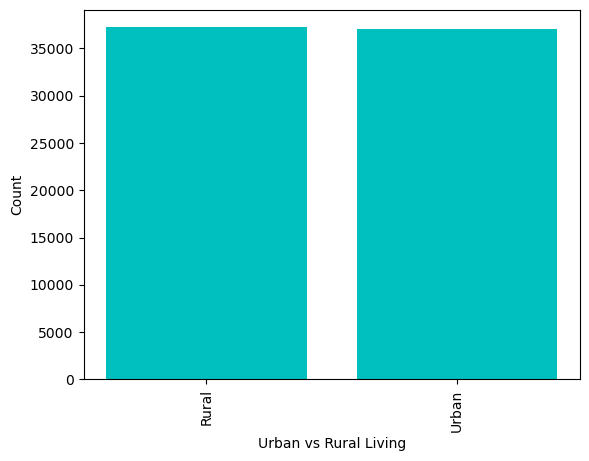

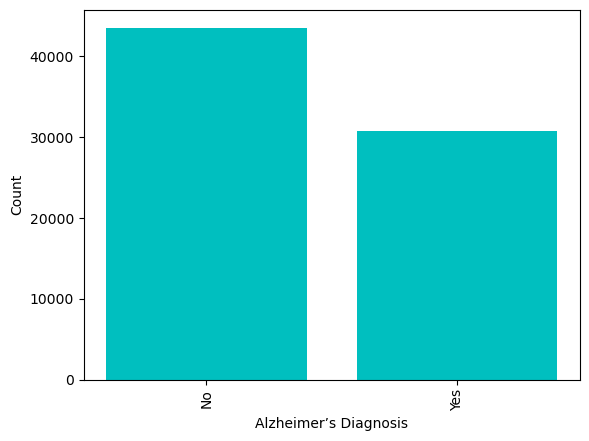

In [8]:
for i in cat:
    vc=df[i].value_counts()
    plt.bar(vc.index,height=vc,color='c')
    plt.xlabel(i)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

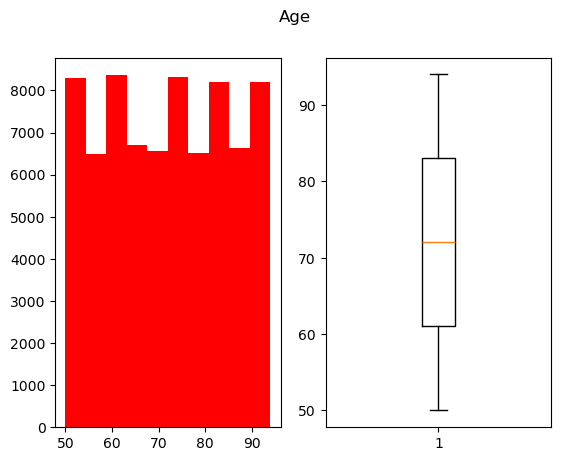

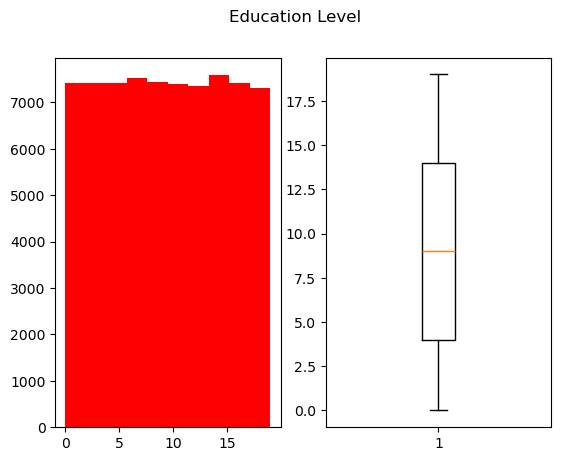

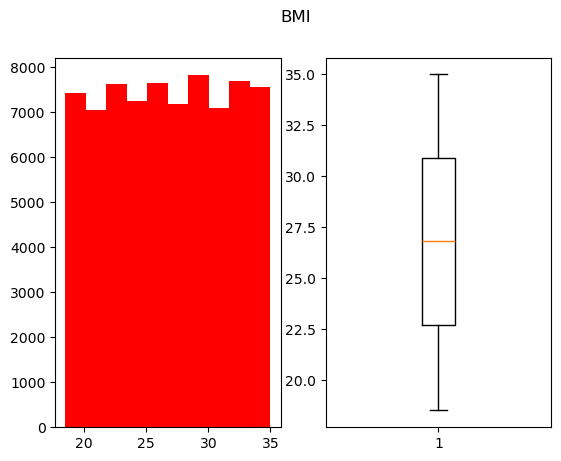

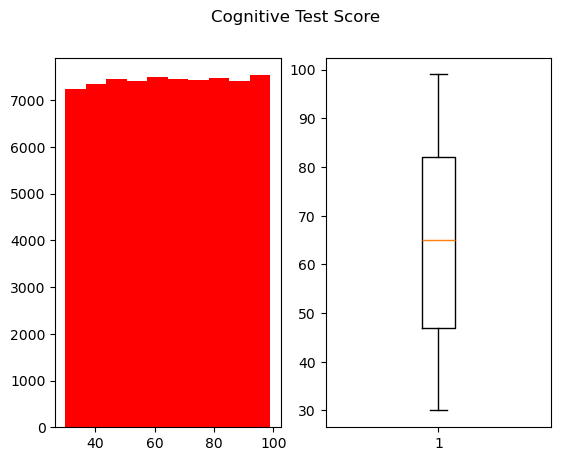

In [9]:
 for i in num:
    fig, ax=plt.subplots(1,2)
    ax[0].hist(df[i],color='r')
    ax[1].boxplot(df[i])
    plt.suptitle(i)
    plt.show()

In [10]:
df.columns

Index(['Country', 'Age', 'Gender', 'Education Level', 'BMI',
       'Physical Activity Level', 'Smoking Status', 'Alcohol Consumption',
       'Diabetes', 'Hypertension', 'Cholesterol Level',
       'Family History of Alzheimer’s', 'Cognitive Test Score',
       'Depression Level', 'Sleep Quality', 'Dietary Habits',
       'Air Pollution Exposure', 'Employment Status', 'Marital Status',
       'Genetic Risk Factor (APOE-ε4 allele)', 'Social Engagement Level',
       'Income Level', 'Stress Levels', 'Urban vs Rural Living',
       'Alzheimer’s Diagnosis'],
      dtype='object')

In [11]:
df['Physical Activity Level'].value_counts()

Physical Activity Level
High      24853
Low       24754
Medium    24676
Name: count, dtype: int64

In [12]:
df['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\1277379956.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Gender'].replace(to_replace=['Male','Female'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\1277379956.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tru

In [13]:
df['Physical Activity Level'].replace(to_replace=['High','Medium','Low'],value=[2,1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3005381040.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Physical Activity Level'].replace(to_replace=['High','Medium','Low'],value=[2,1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3005381040.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no

In [14]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe_smoke=OneHotEncoder(sparse_output=False)
smoke_status=ohe_smoke.fit_transform(df[['Smoking Status']])
Smoke_Status=pd.DataFrame(smoke_status,columns=ohne_smoke.categories_)
Smoke_Status.drop('Current',axis=1,inplace=True)
Smoke_Status

In [15]:
df['Alcohol Consumption'].replace(to_replace=['Regularly','Occasionally','Never'],value=[2,1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\1917824075.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Alcohol Consumption'].replace(to_replace=['Regularly','Occasionally','Never'],value=[2,1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\1917824075.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('

In [16]:
df.drop(['Diabetes','Genetic Risk Factor (APOE-ε4 allele)'],axis=1,inplace=True)

In [103]:
df.columns

Index([                      'Country',                           'Age',
                              'Gender',               'Education Level',
                                 'BMI',       'Physical Activity Level',
                      'Smoking Status',           'Alcohol Consumption',
                        'Hypertension',             'Cholesterol Level',
       'Family History of Alzheimer’s',          'Cognitive Test Score',
                    'Depression Level',                 'Sleep Quality',
                      'Dietary Habits',        'Air Pollution Exposure',
                   'Employment Status',                'Marital Status',
             'Social Engagement Level',                  'Income Level',
                       'Stress Levels',         'Urban vs Rural Living',
               'Alzheimer’s Diagnosis',                  ('Argentina',),
                        ('Australia',),                     ('Brazil',),
                           ('Canada',),            

In [18]:
df['Hypertension'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3581385138.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Hypertension'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3581385138.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', Tr

In [19]:
df['Smoking Status'].replace(to_replace=['Former','Current','Never'],value=[1,2,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3800699372.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Smoking Status'].replace(to_replace=['Former','Current','Never'],value=[1,2,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3800699372.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_sil

In [20]:
df



,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,...,Sleep Quality,Dietary Habits,Air Pollution Exposure,Employment Status,Marital Status,Social Engagement Level,Income Level,Stress Levels,Urban vs Rural Living,Alzheimer’s Diagnosis
0,Spain,90,1,1,33.0,1,0,1,0,Normal,...,Poor,Healthy,High,Retired,Single,Low,Medium,High,Urban,No
1,Argentina,72,1,7,29.9,1,1,0,0,Normal,...,Good,Healthy,Medium,Unemployed,Widowed,High,Low,High,Urban,No
2,South Africa,86,0,19,22.9,2,2,1,1,Normal,...,Good,Average,Medium,Employed,Single,Low,Medium,High,Rural,No
3,China,53,1,17,31.2,0,0,2,0,Normal,...,Average,Healthy,Medium,Retired,Single,High,Medium,Low,Rural,No
4,Sweden,58,0,3,30.0,2,1,0,0,Normal,...,Poor,Unhealthy,High,Employed,Married,Low,Medium,High,Rural,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,0,3,22.6,2,1,0,0,High,...,Poor,Average,High,Unemployed,Widowed,Medium,High,Medium,Rural,No
74279,UK,58,1,18,30.6,0,0,1,0,Normal,...,Poor,Average,Medium,Unemployed,Single,Medium,High,High,Rural,No
74280,Spain,57,0,13,28.2,1,0,2,0,High,...,Good,Healthy,Low,Employed,Single,High,Low,Low,Rural,No
74281,Brazil,73,0,7,29.0,0,0,2,0,High,...,Good,Healthy,Low,Employed,Widowed,Low,Low,High,Rural,No


In [53]:
ohe_country=OneHotEncoder(sparse_output=False)
country_df=ohe_country.fit_transform(df[['Country']])
country=pd.DataFrame(country_df,columns=ohe_country.categories_)
country.drop('China',axis=1,inplace=True)
country

,Argentina,Australia,Brazil,Canada,France,Germany,India,Italy,Japan,Mexico,Norway,Russia,Saudi Arabia,South Africa,South Korea,Spain,Sweden,UK,USA
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74280,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
74281,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [55]:
df=pd.concat([df,country],axis=1)

In [95]:
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,...,"(South Africa,)","(South Korea,)","(Spain,)","(Sweden,)","(UK,)","(USA,)","(Retired,)","(Unemployed,)","(Single,)","(Widowed,)"
0,Spain,90,1,1,33.0,1,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Argentina,72,1,7,29.9,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,South Africa,86,0,19,22.9,2,2,1,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,China,53,1,17,31.2,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Sweden,58,0,3,30.0,2,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,0,3,22.6,2,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
74279,UK,58,1,18,30.6,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
74280,Spain,57,0,13,28.2,1,0,2,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74281,Brazil,73,0,7,29.0,0,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [61]:
ohe_es=OneHotEncoder(sparse_output=False)
empl_stat_df=ohe_es.fit_transform(df[['Employment Status']])
empl_stat=pd.DataFrame(empl_stat_df,columns=ohe_es.categories_)
empl_stat.drop('Employed',axis=1,inplace=True)
empl_stat

,Retired,Unemployed
0,1.0,0.0
1,0.0,1.0
2,0.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
74278,0.0,1.0
74279,0.0,1.0
74280,0.0,0.0
74281,0.0,0.0


In [67]:
df=pd.concat([df,empl_stat],axis=1)

In [85]:
ohe_marital=OneHotEncoder(sparse_output=False)
marital_stat=ohe_marital.fit_transform(df[['Marital Status']])
marital_stat_df=pd.DataFrame(marital_stat,columns=ohe_marital.categories_)
marital_stat_df.drop('Married',axis=1,inplace=True)
marital_stat_df

,Single,Widowed
0,1.0,0.0
1,0.0,1.0
2,1.0,0.0
3,1.0,0.0
4,0.0,0.0
...,...,...
74278,0.0,1.0
74279,1.0,0.0
74280,1.0,0.0
74281,0.0,1.0


In [87]:
df=pd.concat([df,marital_stat_df],axis=1)

In [93]:
df['Cholesterol Level'].replace(to_replace=['Normal','High'],value=[0,1],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\2644917685.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Cholesterol Level'].replace(to_replace=['Normal','High'],value=[0,1],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\2644917685.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downca

In [99]:
df['Family History of Alzheimer’s'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\2080811147.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Family History of Alzheimer’s'].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\2080811147.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [105]:
df.columns

Index([                      'Country',                           'Age',
                              'Gender',               'Education Level',
                                 'BMI',       'Physical Activity Level',
                      'Smoking Status',           'Alcohol Consumption',
                        'Hypertension',             'Cholesterol Level',
       'Family History of Alzheimer’s',          'Cognitive Test Score',
                    'Depression Level',                 'Sleep Quality',
                      'Dietary Habits',        'Air Pollution Exposure',
                   'Employment Status',                'Marital Status',
             'Social Engagement Level',                  'Income Level',
                       'Stress Levels',         'Urban vs Rural Living',
               'Alzheimer’s Diagnosis',                  ('Argentina',),
                        ('Australia',),                     ('Brazil',),
                           ('Canada',),            

In [109]:
df['Depression Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3292459735.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Depression Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3292459735.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent

In [113]:
df['Sleep Quality'].replace(to_replace=['Good','Average','Poor'],value=[2,1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\837484534.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Sleep Quality'].replace(to_replace=['Good','Average','Poor'],value=[2,1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\837484534.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [119]:
df['Dietary Habits'].replace(to_replace=['Healthy','Average','Unhealthy'],value=[2,1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\4136025851.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Dietary Habits'].replace(to_replace=['Healthy','Average','Unhealthy'],value=[2,1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\4136025851.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.n

In [127]:
df['Air Pollution Exposure'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\330924400.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Air Pollution Exposure'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)


In [133]:
df['Social Engagement Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\118576739.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Social Engagement Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\118576739.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_s

In [141]:
df['Income Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\167890773.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Income Level'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\167890773.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downc

In [145]:
df['Stress Levels'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3268337187.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Stress Levels'].replace(to_replace=['Medium','Low','High'],value=[1,0,2],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3268337187.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_do

In [151]:
df['Urban vs Rural Living'].replace(to_replace=['Rural','Urban'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\780395937.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Urban vs Rural Living'].replace(to_replace=['Rural','Urban'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\780395937.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_down

In [157]:
df["Alzheimer’s Diagnosis"].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)

C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3283234512.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Alzheimer’s Diagnosis"].replace(to_replace=['Yes','No'],value=[1,0],inplace=True)
C:\Users\Sarthak\AppData\Local\Temp\ipykernel_13812\3283234512.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcas

In [162]:
df.columns

Index([                      'Country',                           'Age',
                              'Gender',               'Education Level',
                                 'BMI',       'Physical Activity Level',
                      'Smoking Status',           'Alcohol Consumption',
                        'Hypertension',             'Cholesterol Level',
       'Family History of Alzheimer’s',          'Cognitive Test Score',
                    'Depression Level',                 'Sleep Quality',
                      'Dietary Habits',        'Air Pollution Exposure',
                   'Employment Status',                'Marital Status',
             'Social Engagement Level',                  'Income Level',
                       'Stress Levels',         'Urban vs Rural Living',
               'Alzheimer’s Diagnosis',                  ('Argentina',),
                        ('Australia',),                     ('Brazil',),
                           ('Canada',),            

In [164]:
X_df=df.drop(['Country','Employment Status','Marital Status','Alzheimer’s Diagnosis'],axis=1)
y=df['Alzheimer’s Diagnosis']

In [166]:
X=X_df.values

In [170]:
X

array([[90.,  1.,  1., ...,  0.,  1.,  0.],
       [72.,  1.,  7., ...,  1.,  0.,  1.],
       [86.,  0., 19., ...,  0.,  1.,  0.],
       ...,
       [57.,  0., 13., ...,  0.,  1.,  0.],
       [73.,  0.,  7., ...,  0.,  0.,  1.],
       [57.,  0.,  1., ...,  1.,  1.,  0.]])

In [168]:
Y=y.values
Y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [172]:
df

,Country,Age,Gender,Education Level,BMI,Physical Activity Level,Smoking Status,Alcohol Consumption,Hypertension,Cholesterol Level,...,"(South Africa,)","(South Korea,)","(Spain,)","(Sweden,)","(UK,)","(USA,)","(Retired,)","(Unemployed,)","(Single,)","(Widowed,)"
0,Spain,90,1,1,33.0,1,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,Argentina,72,1,7,29.9,1,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
2,South Africa,86,0,19,22.9,2,2,1,1,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,China,53,1,17,31.2,0,0,2,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4,Sweden,58,0,3,30.0,2,1,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74278,Russia,60,0,3,22.6,2,1,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
74279,UK,58,1,18,30.6,0,0,1,0,0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
74280,Spain,57,0,13,28.2,1,0,2,0,1,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
74281,Brazil,73,0,7,29.0,0,0,2,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
